<h1>
    <b>
        <u>
            Network scanning

For this practice I will use a script written in Python by me. The file will be named as "PortScan.py"

In [ ]:
# First, we import scapy
from scapy.all import *

# We create a list named "ports" that contains the ports that will be scanned
ports = [25, 80, 53, 443, 445, 8080, 8443]

# Function SynScan will perform a TCP SYN scan on a given host as a parameter.

# Sends crafted packets:

# IP(dst=host) = destination IP is the target host.

# TCP(sport=5555, dport=ports, flags="S") = source port 5555, destination ports = ports list, with SYN flag set (SYN scan).

# sr() = send and receive packets.

# Returns ans (answered packets) and unans (unanswered packets).

# timeout=2 = waits 2 seconds for replies.

# verbose=0 = suppresses output.

def SynScan(host):
    ans, unans = sr(IP(dst=host)/TCP(sport=5555, dport=ports, flags="S"), timeout=2, verbose=0)
    print("Open ports at %s: " % host) # Prints the header showing the target host’s open ports.
    for (s, r,) in ans: # Loop for going through each answered packet pair
        if s[TCP].dport == r[TCP].sport: # s = sent packet. r = received packet.
            print(s[TCP].dport) # if packets match is true, prints the open port number

# Define a function to check if host is running a DNS Server
#Crafts and sends a DNS request:

# IP(dst=host) = destination is the target host.

# UDP(sport=5555, dport=53) = UDP packet, source port 5555, destination port 53 (DNS).

# DNS(rd=1, qd=DNSQR(qname=input("URL: "))) = recursive DNS query (rd=1), with a question (qd) asking for the domain the user inputs.

# sr() sends and waits for a response.

ans = responses, unans = unanswered.
def DNSScan(host):
    ans, unans = sr(IP(dst=host)/UDP(sport=5555, dport=53)/DNS(rd=1, qd=DNSQR(qname=input("URL: "))), timeout=2, verbose=0)
    if ans:
        print("DNS Server at %s" % host)
    else:
        print("DNS Server not found")

# Target set as Google public DNS server 
host = 8.8.8.8

# Functions calling
SynScan(host)
DNSScan(host)

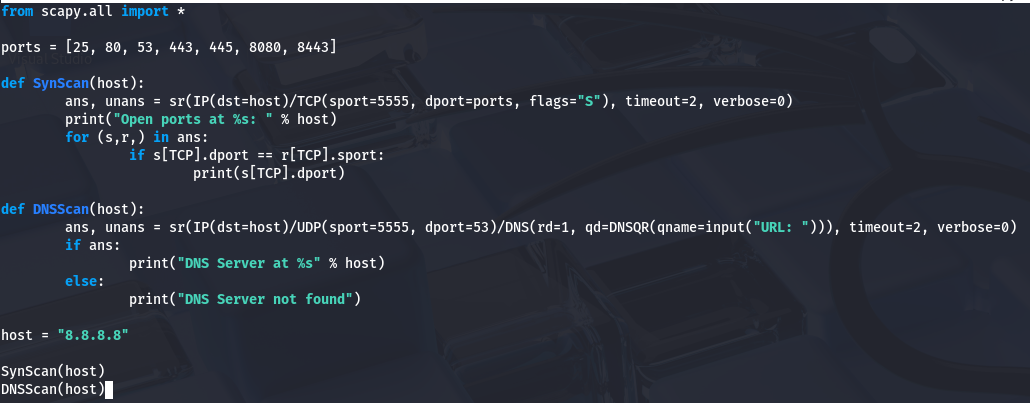